<a href="https://colab.research.google.com/github/HayaAbdullahM/Seat-Belt-Detection/blob/Yolov9/Seat_Belt_Detection_yolo_v09_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Access to GPU.
!nvidia-smi

Thu Mar 28 14:41:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Make HOME to the current working directory's path and prints it.
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Clones the "yolov9" repository from GitHub, local copy to work with.
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 325 (delta 152), reused 118 (delta 118), pack-reused 123
Receiving objects: 100% (325/325), 2.26 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:

In [ ]:
# Install the roboflow package.
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00


In [ ]:
# Download model weights.
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
# Dataset formatted for use with YOLOv9.
import roboflow
roboflow.login()
rf = roboflow.Roboflow(api_key="g45JUusQYcWYulQqZyjP")
project = rf.workspace("fay-regu8").project("seat_belt-iauiy")
version = project.version(2)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seat_Belt-2 in yolov9:: 100%|██████████| 1190/1190 [00:00<00:00, 7699.78it/s]


In [ ]:
# Train The Model.
# Changes the current directory to the yolov9 directory.
%cd {HOME}/yolov9

# batch 16 -> how many training examples are processed together in one iteration.
# epochs 200 -> training process will run for 200 epochs.
# img 640 -> image size as 640x640 pixels.
!python train.py \
--batch 16 --epochs 200 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-28 14:45:43.607376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 14:45:43.607424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 14:45:43.608740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 14:45:44.707783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Seat_Belt-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, 

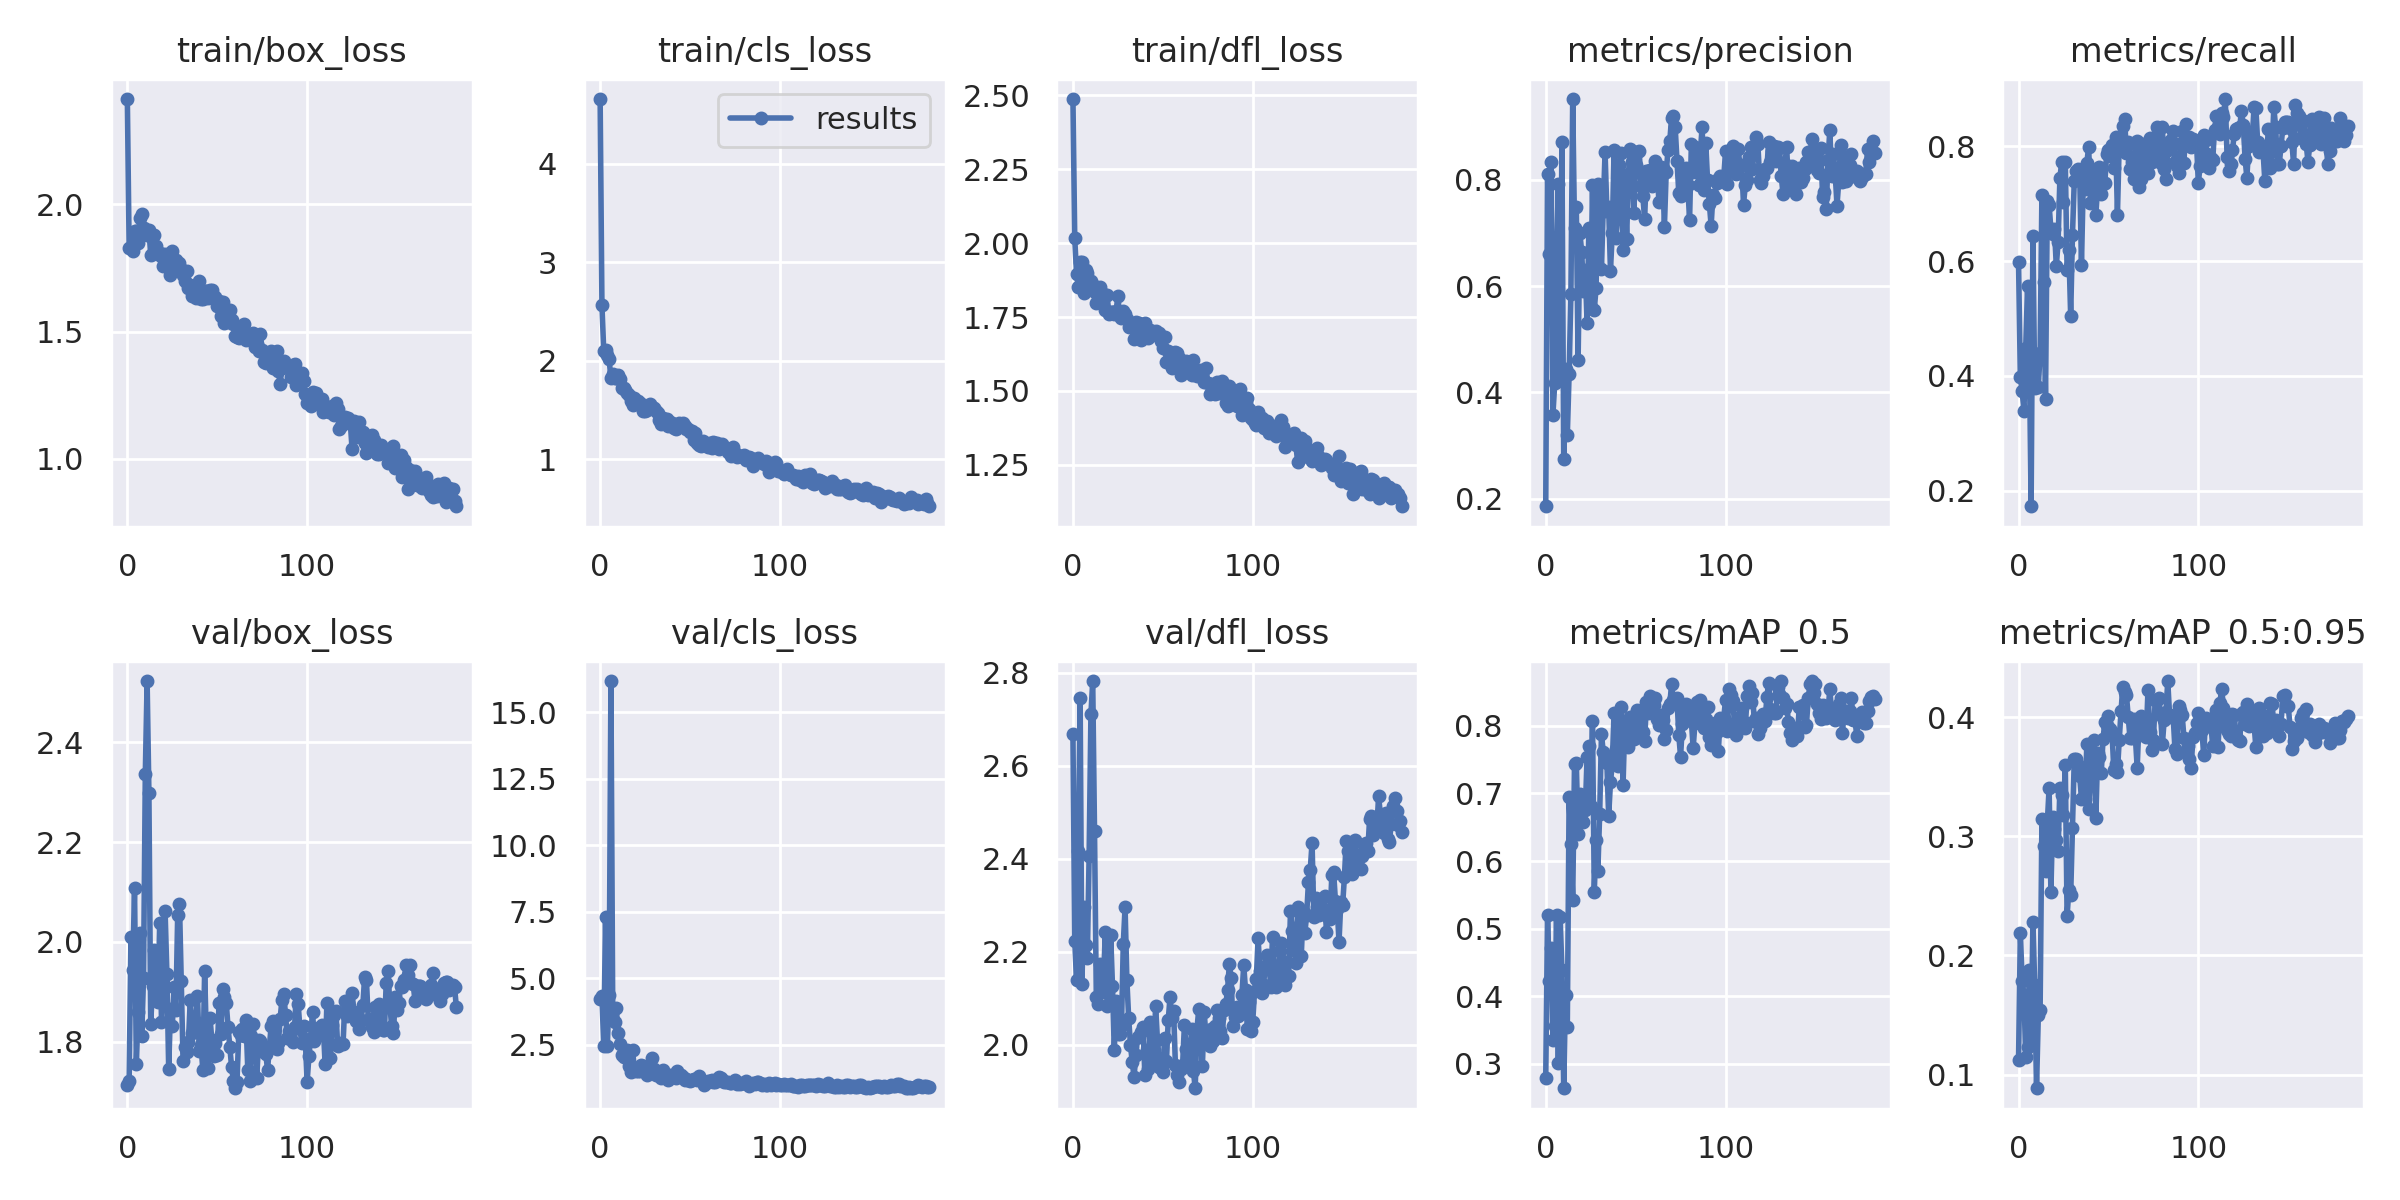

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

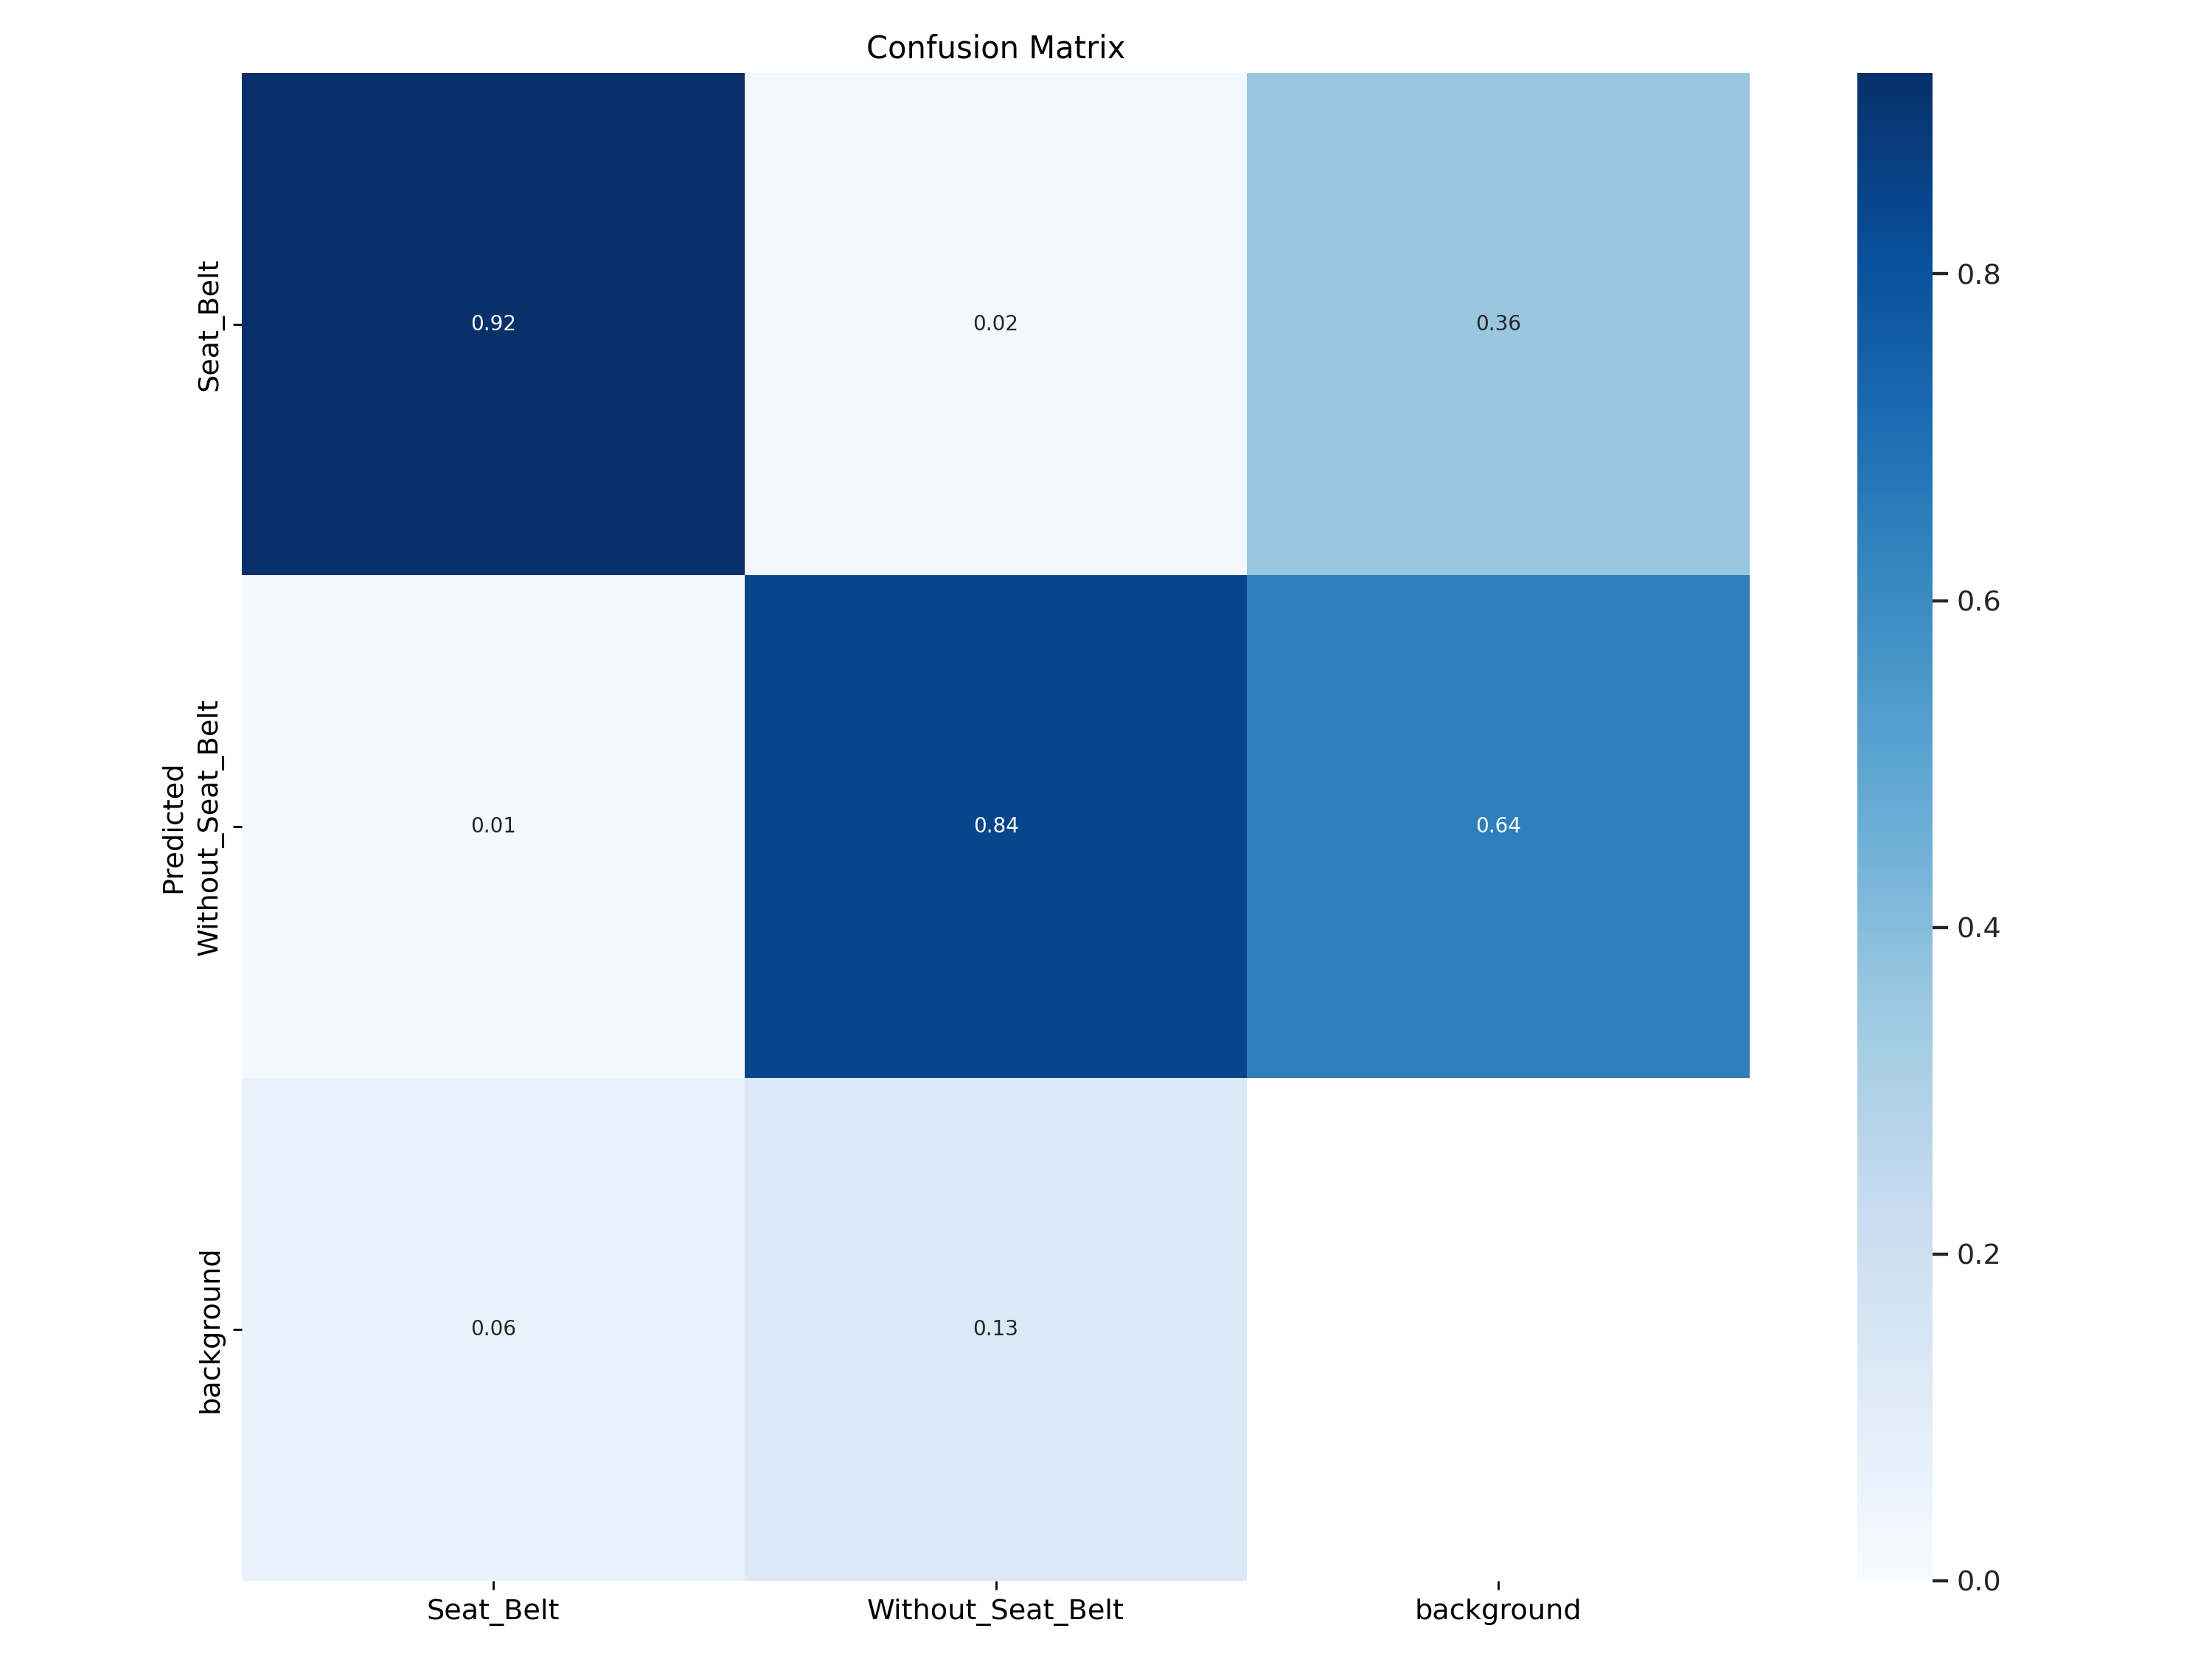

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=800)

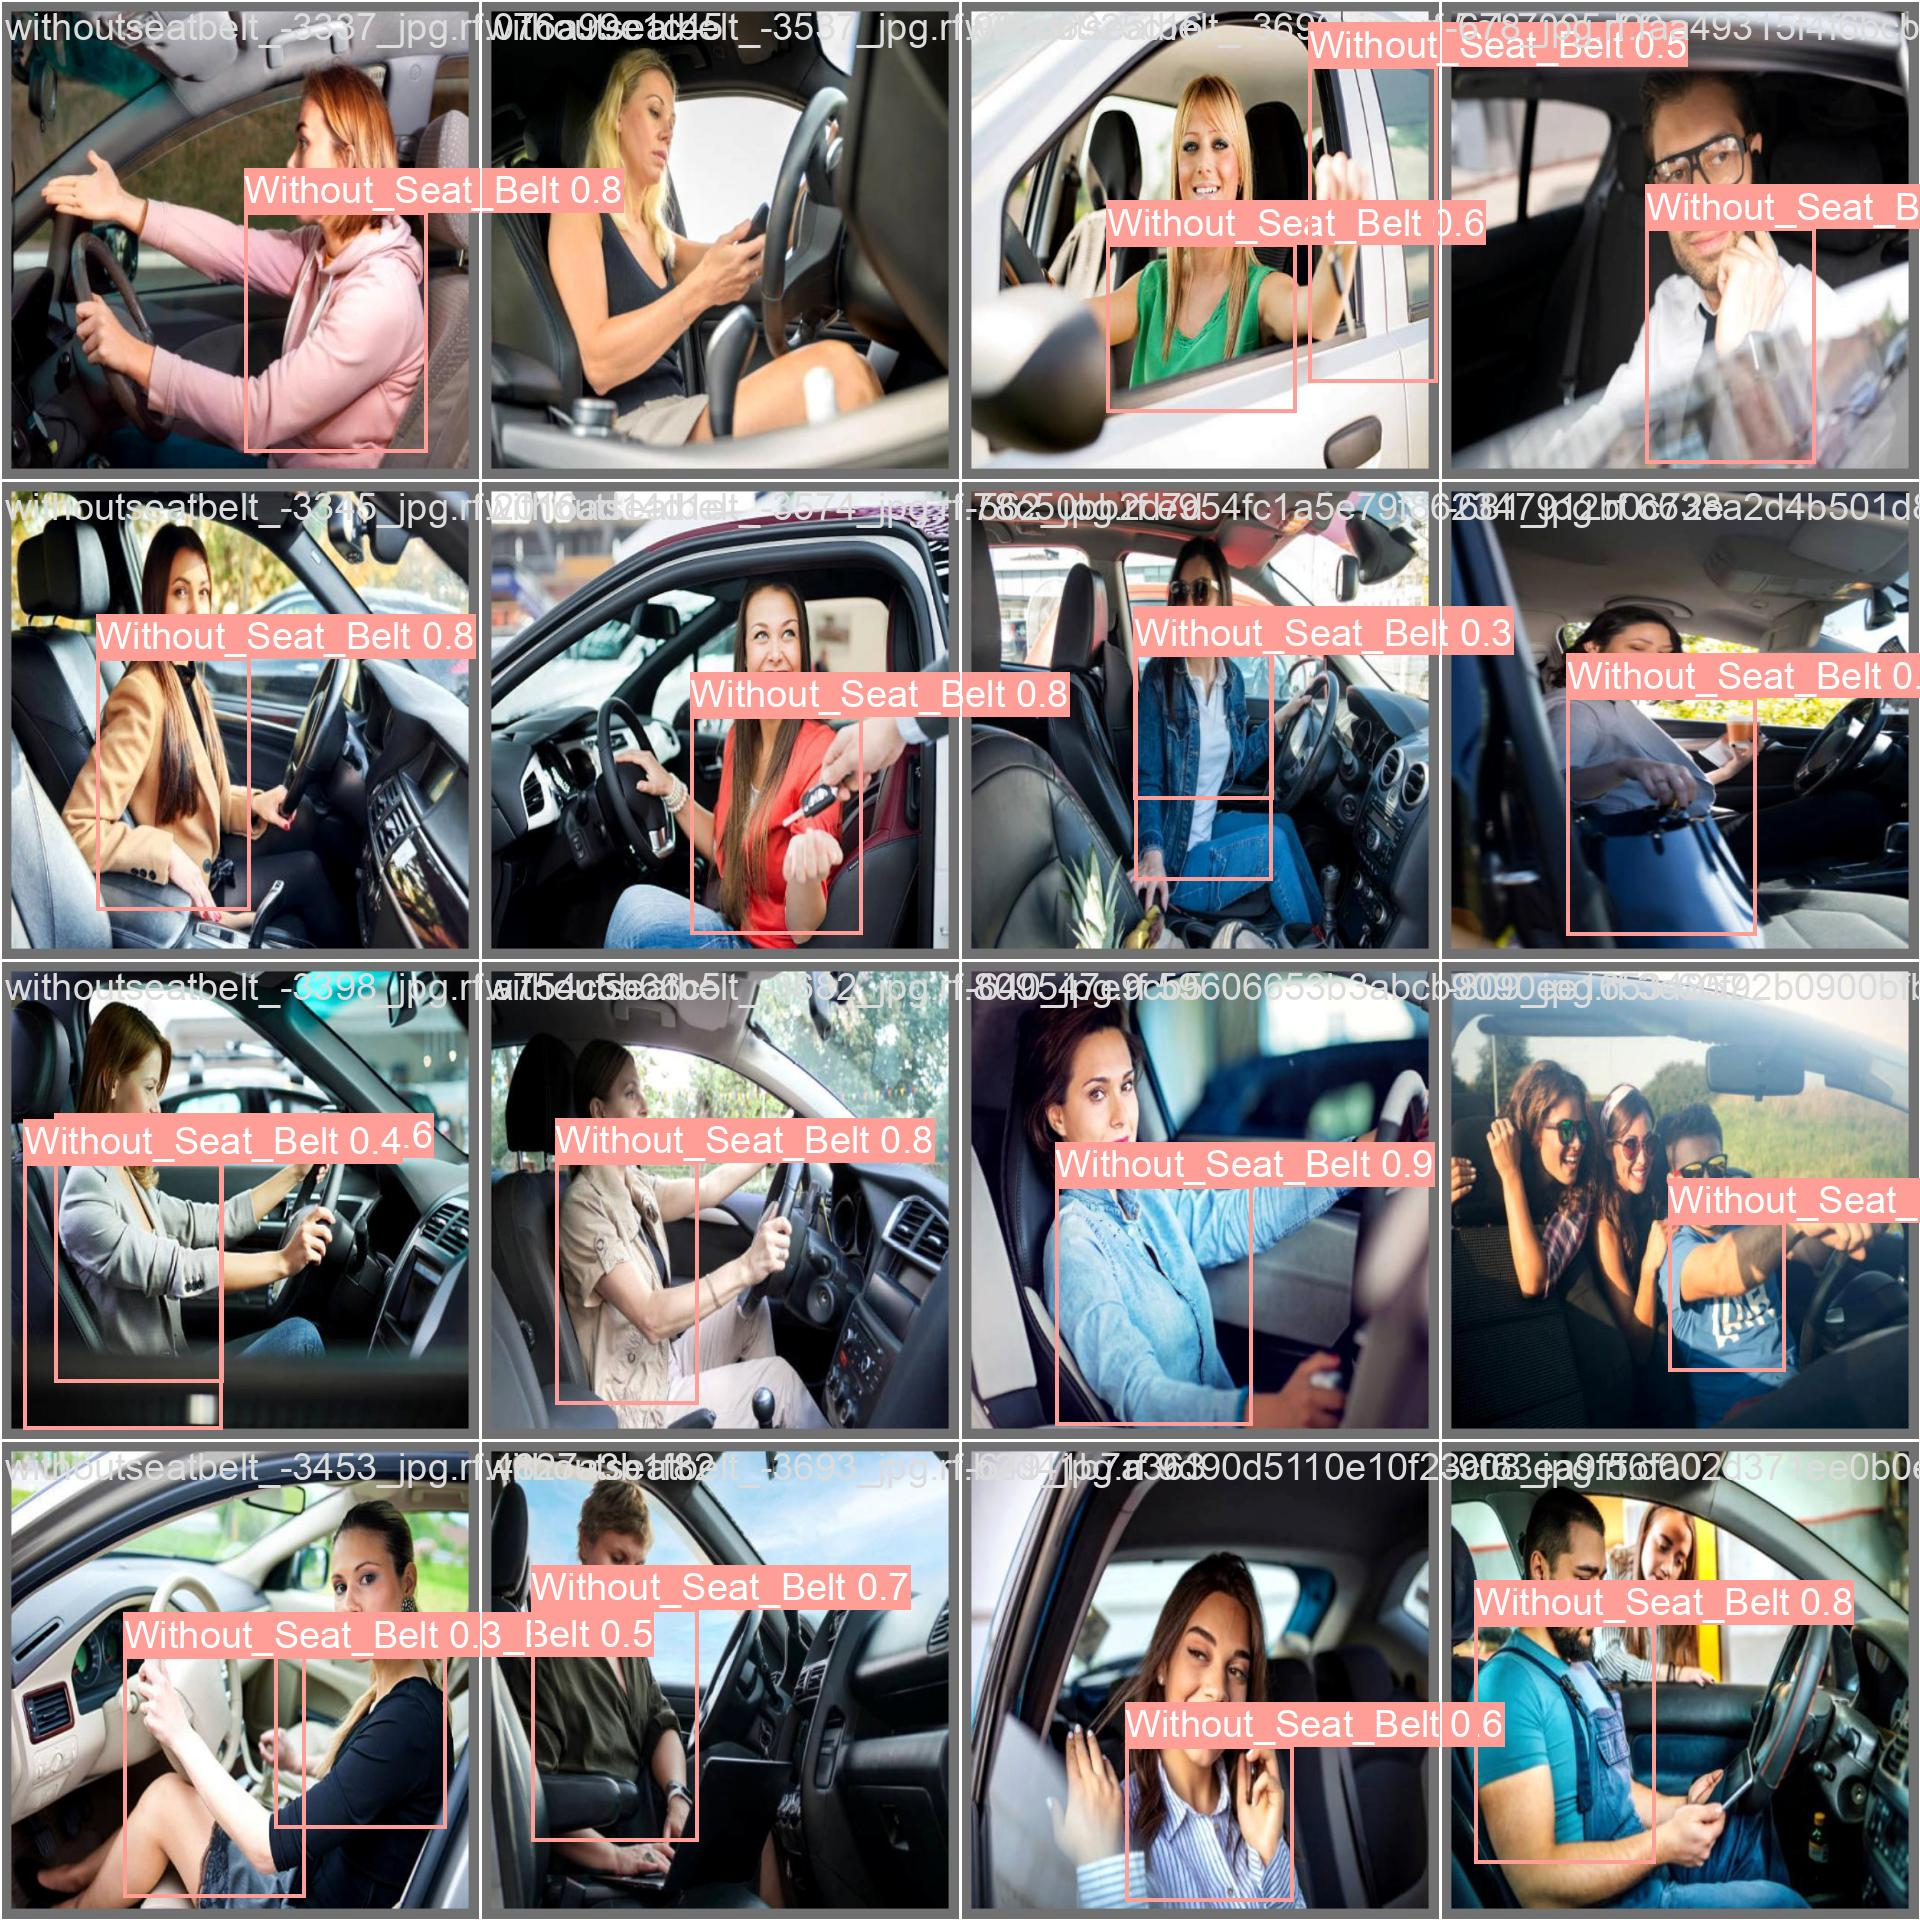

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=2000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creates a new directory named "Colab Output" in the Google Drive, for storing output files.
!mkdir "/content/drive/My Drive/Colab Output"

In [ ]:
# Compresses the contents of the /content/yolov9/runs directory into a ZIP file named yolov9_runs.zip and saves it in the "Colab Output" directory.
!zip -r "/content/drive/My Drive/Colab Output/yolov9_runs.zip" /content/yolov9/runs

  adding: content/yolov9/runs/ (stored 0%)
  adding: content/yolov9/runs/val/ (stored 0%)
  adding: content/yolov9/runs/val/exp/ (stored 0%)
  adding: content/yolov9/runs/detect/ (stored 0%)
  adding: content/yolov9/runs/detect/exp/ (stored 0%)
  adding: content/yolov9/runs/train/ (stored 0%)
  adding: content/yolov9/runs/train/exp2/ (stored 0%)
  adding: content/yolov9/runs/train/exp2/PR_curve.png (deflated 19%)
  adding: content/yolov9/runs/train/exp2/val_batch1_pred.jpg (deflated 8%)
  adding: content/yolov9/runs/train/exp2/confusion_matrix.png (deflated 31%)
  adding: content/yolov9/runs/train/exp2/F1_curve.png (deflated 11%)
  adding: content/yolov9/runs/train/exp2/opt.yaml (deflated 49%)
  adding: content/yolov9/runs/train/exp2/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov9/runs/train/exp2/events.out.tfevents.1711637145.03f114b124c8.1961.0 (deflated 57%)
  adding: content/yolov9/runs/train/exp2/labels_correlogram.jpg (deflated 44%)
  adding: content/yolov9/runs/train/